<div class="alert alert-success">

## Instructions to students

If the assignment was fetched from the assignments tab, do not change the name of the assignment file(s).

### Code answers

In questions that require you to write code, there will be a code cell containing: 
    
<code># YOUR CODE HERE</code>
<br>
<code>raise NotImplementedError()</code>
    
When you are ready to write your answer, delete <code>raise NotImplementedError()</code> and write your code.

### Submitting your work
    
You should save your work before you submit ("Save" icon in top menu).
    
Before you submit, ensure that the notebook can be run from start to finish by pressing the "Restart & Run All" option in the "Kernel" menu above.
    
Once you are ready, go to the assignments tab on the Noteable landing page and click "Submit" on the relevant assignment.

</div>

**Question 6**: The code in the cell below has errors. There are errors preventing the code to run as intended. 

Your **task** is to find all mistakes, remove them, make the code function properly such that it presents a correct figure at the end. 

It is strongly recommended to start the exercise by copying the entire code to a separate python file and examine it in Spyder.

**Note A**: Leave the function names unchanged. Some may be assumed in tests. Constant values as given are all correct.

**Note B**: Copy your final solution back into the cell below so that the tests can run.

##### What is this code?

This fault-finding exercise shows the creation of a bespoke random number generator from histogram data from file, typically from a measurement. The recipe for this task is in the script, section 4.2.2. The 6 steps in the code refer to the recipe in the script.

The data to read contains the standard solar irradiance spectrum with variable bin widths, i.e. in the first column you find variable wavelength intervals in units of nano metre (nm). In the second column are the direct solar irradiance values in units of Watt per square metre and nm (W/m$^{2}$/nm). It is a text file, with comma-separated values (you can inspect it) and a single header line.

Turning this standard spectrum into a bespoke random number generator is useful for modelling solar irradiance effects, for instance using it as a light source.

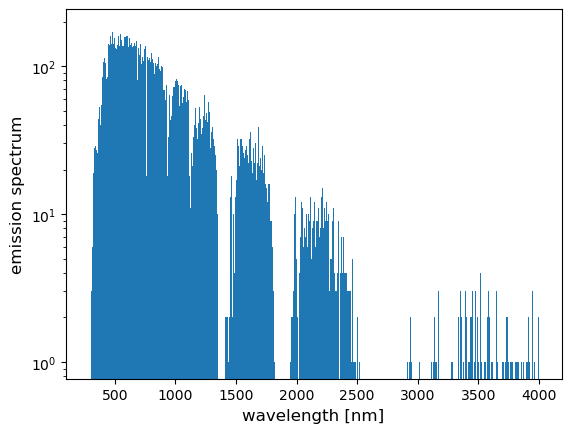

In [4]:
'''
Script:
Demonstrate a solar irradiance random number generator.
'''
# YOUR CODE HERE
import numpy as np
from random import random, uniform
import matplotlib.pyplot as plt

# get data from file
alldata = np.loadtxt("am15.csv", delimiter = ',') # file should be downloaded together with notebook exercise.

bin_edges = alldata[:,0] # [nm]
spectrum  = alldata[:,1] # W/m^2/nm

# step 1
bindifferences = np.diff(bin_edges, append = (bin_edges[-1]))
norm = np.sum(spectrum*bindifferences) # YR: this variable is needed in the test, leave name unchanged.
normalized = spectrum / norm

# step 2
cumulative = np.cumsum(normalized*bindifferences)

store = []
nsims = 100000 # YR: for a good test plot need a lot of simulations, leave unchanged for submission.
for _ in range(nsims):
    # step 4
    trial = random()
    # step 5
    idx = np.where(cumulative >= trial)[0] # all indices
    upperbin = bin_edges[1 + idx[0]] # take only the first index
    lowerbin = bin_edges[idx[0]]

    # step 6
    value = uniform(lowerbin, upperbin)
    store.append(value)

# YR: no error below this line, variable 'data' is needed in test, leave name unchanged.
data = np.array(store)
plt.hist(data, bins=bin_edges, log=True)
plt.xlabel('wavelength [nm]', fontsize=12)
plt.ylabel('emission spectrum', fontsize=12)
plt.show()


Manual plot marking with feedback where appropriate.

In [2]:
# test, do not delete

In [3]:
# test, do not delete

### Tests - 2 marks; Plot - 2 marks